In [2]:
# Import necessary packages here, e.g.
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import matplotlib.dates as mdates
import requests
import xarray as xr 
import pandas as pd
from datetime import datetime 

import matplotlib.dates as mdates
import requests
import xarray as xr 

,Significant wave height (m),Direction (degrees TN)
Date and time (dd/mm/yyyy HH:MM AEST),,
1979-01-15,1.32,84
1979-01-15,1.24,69
1979-01-15,1.26,81
1979-01-15,1.31,75
1979-01-15,1.16,90


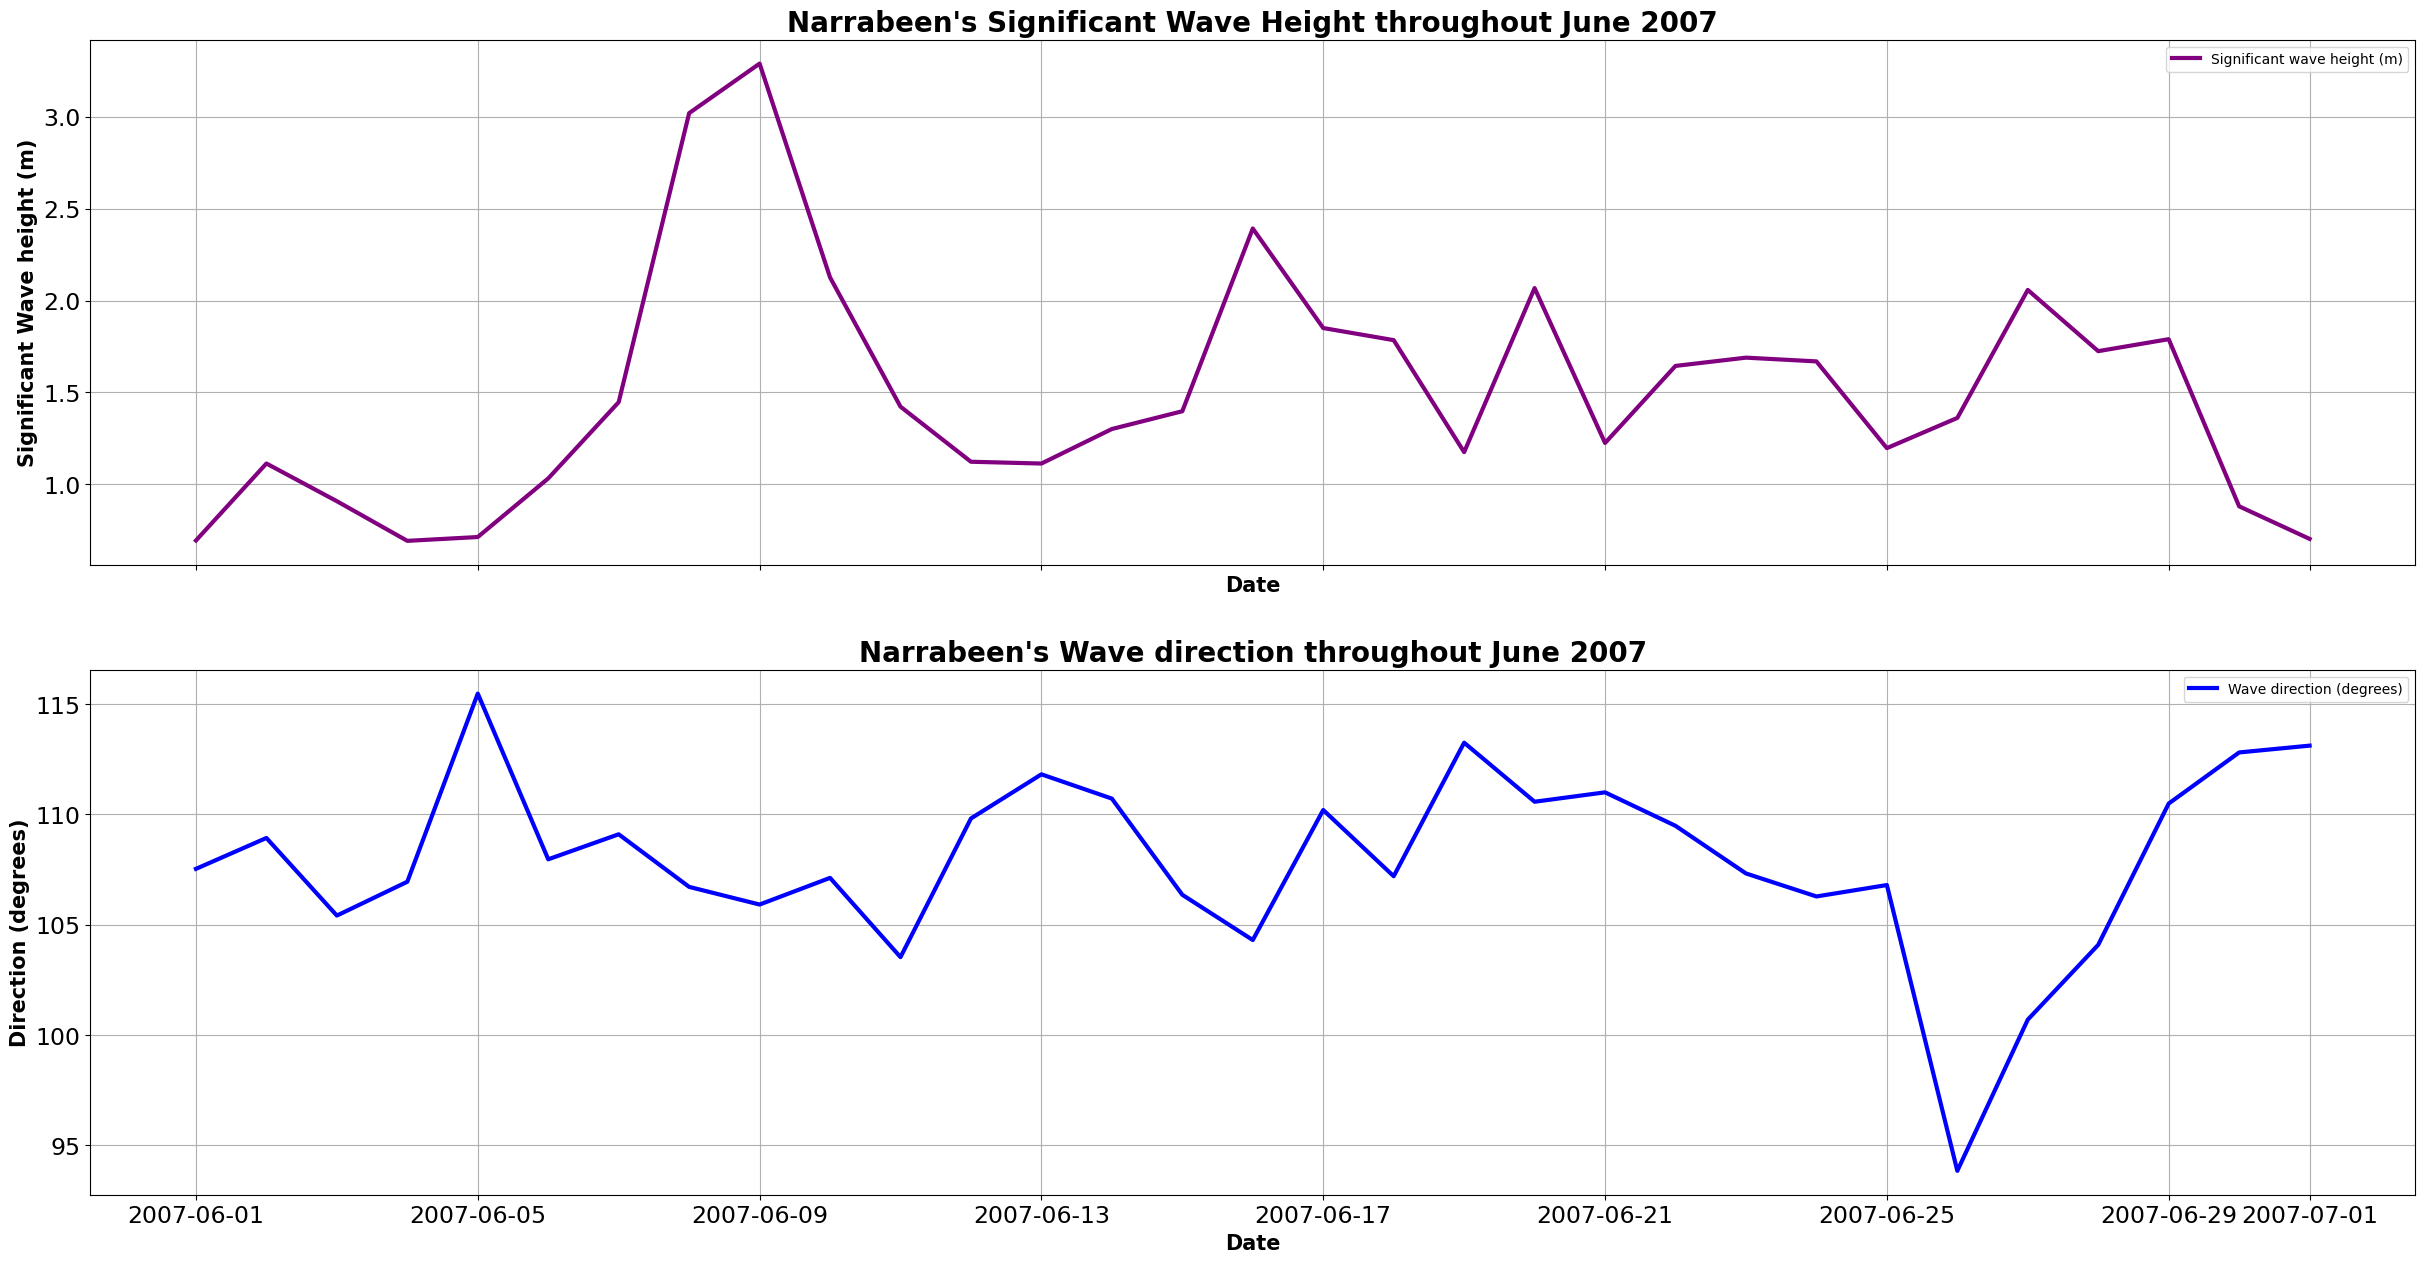

In [3]:
#extra that went wrong:

wave_file = pd.read_csv("http://narrabeen.wrl.unsw.edu.au/coastalstatic/descriptor_files/Inshore_Waves.csv")

waved = pd.to_datetime(wave_file['Date and time (dd/mm/yyyy HH:MM AEST)'], format='%d/%m/%Y %H:%M') #trying to make it datetime
wave_file['Date and time (dd/mm/yyyy HH:MM AEST)'] = waved #overiding and cleaning up 
waved_selected = wave_file[['Date and time (dd/mm/yyyy HH:MM AEST)', 'Significant wave height (m)', 'Direction (degrees TN)']] #just to pull out data, sig height, and direction 
waved_selected = waved_selected.set_index('Date and time (dd/mm/yyyy HH:MM AEST)').sort_index()


# Filter the rows where the date is between start_date and end_date - Data analiss 
display(waved_selected.head())
start_date = '2007-06-01' 
end_date = '2007-07-01' #create a boolean? easier way to do it
waved_average = waved_selected.resample("D").mean()
waved_filtered = waved_average.loc[start_date:end_date]

fig, axs = plt.subplots(2, 1, figsize=(30, 15), sharex = True) #creates 2 blank subplots that share the same x axis scale of time

#creates first subplot on the top by specify which position (0):  
axs[0].plot(waved_filtered.index, waved_filtered["Significant wave height (m)"], color="purple", linestyle = '-', lw=3, label="Significant wave height (m)") 
axs[0].set_xlabel("Date", fontsize=15,  fontweight="bold") #sets x axis title 
axs[0].set_ylabel("Significant Wave height (m)", fontsize=15,  fontweight="bold")#sets y axis title
axs[0].set_title("Narrabeen's Significant Wave Height throughout June 2007", fontsize = 20,  fontweight="bold")#sets title
axs[0].legend() #add legend 
axs[0].grid() #add grid
axs[0].tick_params("x", labelsize = 17) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 17)  #makes the y-axis ticks be a larger size

#creates second subplot on the top by specify which position (1):  
axs[1].plot(waved_filtered.index, waved_filtered["Direction (degrees TN)"], color="blue", linestyle = '-', lw=3, label= "Wave direction (degrees)") 
axs[1].set_xlabel("Date", fontsize=15,  fontweight="bold") #sets x axis title 
axs[1].set_ylabel("Direction (degrees)", fontsize=15,  fontweight="bold")#sets y axis title
axs[1].set_title("Narrabeen's Wave direction throughout June 2007", fontsize = 20,  fontweight="bold")#sets title
axs[1].legend() #add legend 
axs[1].grid() #add grid
axs[1].tick_params("x", labelsize = 17) #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 17)  #makes the y-axis ticks be a larger size






,Significant wave height (m),Direction (degrees TN)
Date and time (dd/mm/yyyy HH:MM AEST),,
2007-04-01,1.006167,108.900000
2007-04-02,0.762333,100.425000
2007-04-03,0.728833,96.033333
2007-04-04,0.914583,106.366667
2007-04-05,0.916500,107.408333
...,...,...
2007-07-28,0.307917,111.700000
2007-07-29,0.699333,114.525000
2007-07-30,1.029750,110.808333


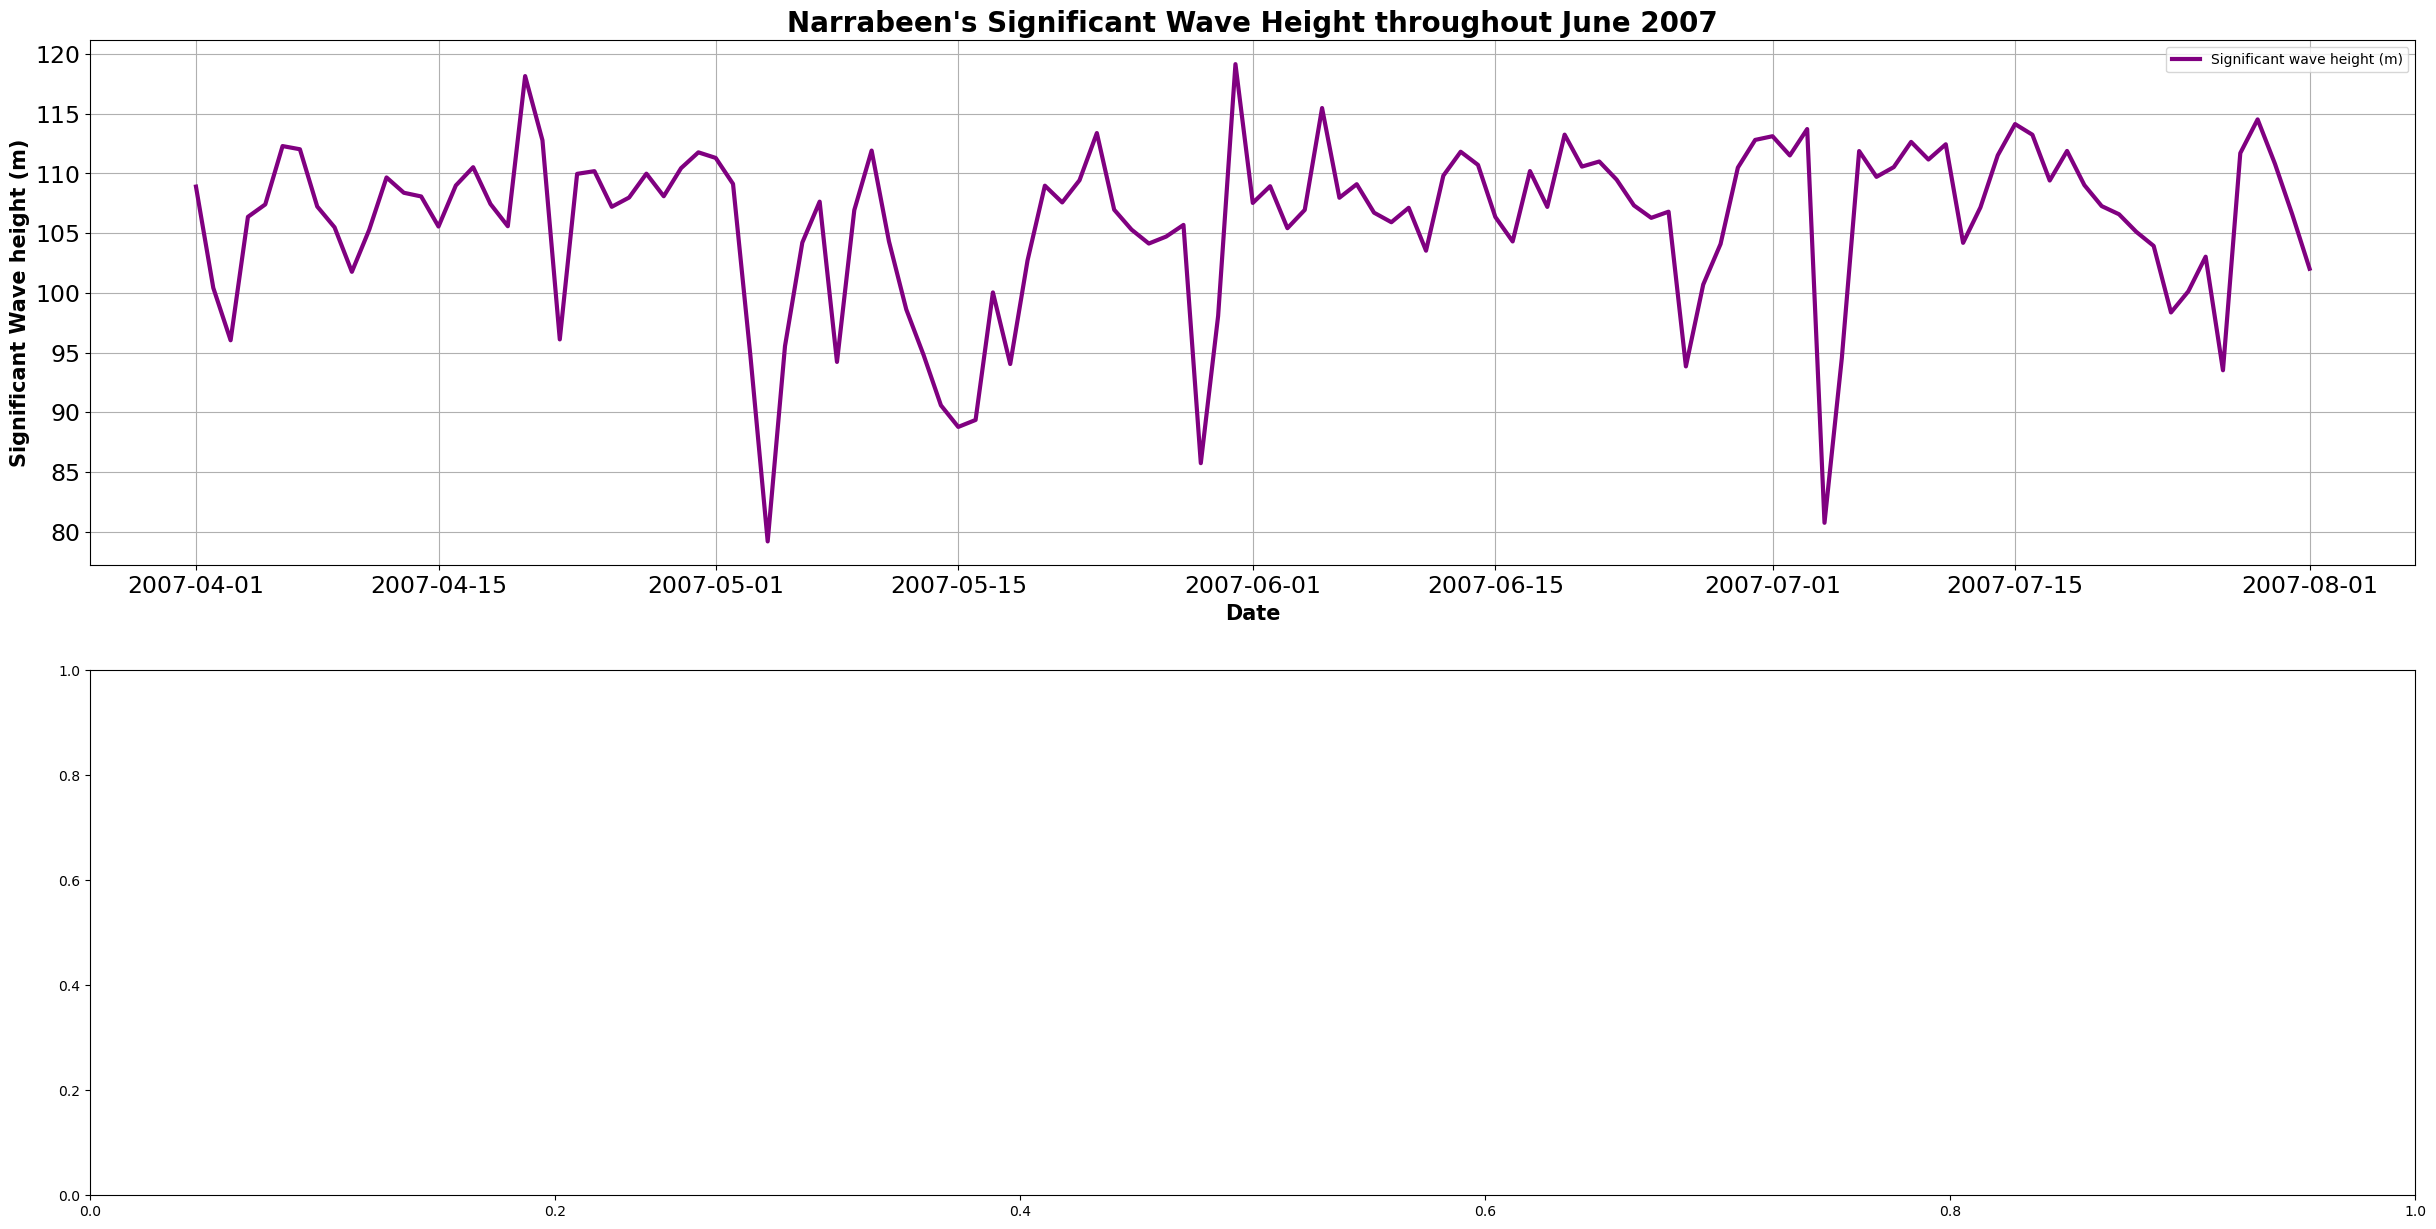

In [4]:
start_date = '2007-04-01' 
end_date = '2007-08-01' #create a boolean? easier way to do it
storm_filtered = waved_average.loc[start_date:end_date]
display(storm_filtered) 


fig, axs = plt.subplots(2, 1, figsize=(30, 15)) #creates 2 blank subplots that share the same x axis scale of time

#creates first subplot on the top by specify which position (0):  
axs[0].plot(storm_filtered.index, storm_filtered["Direction (degrees TN)"], color="purple", linestyle = '-', lw=3, label="Significant wave height (m)") 
axs[0].set_xlabel("Date", fontsize=15,  fontweight="bold") #sets x axis title 
axs[0].set_ylabel("Significant Wave height (m)", fontsize=15,  fontweight="bold")#sets y axis title
axs[0].set_title("Narrabeen's Significant Wave Height throughout June 2007", fontsize = 20,  fontweight="bold")#sets title
axs[0].legend() #add legend 
axs[0].grid() #add grid
axs[0].tick_params("x", labelsize = 17) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 17)  #makes the y-axis ticks be a larger size



In [ ]:
# if a new dataset, load data and perform data cleaning steps
# otherwise, continue to data analysis and figure creation
#. Direction of waves, beach profile over a year
    #. One plot with all three data points
    
    #averages of beach elevation, wave height and direction on one plot

elevation_file = pd.read_csv("Narrabeen_Profiles-4.csv")
display(elevation_file.head())
elevate = pd.to_datetime(elevation_file['Date'], format='%Y-%m-%d')
elevation_file['Date'] = elevate
elevate_selected = elevation_file[['Date', 'Elevation', 'Chainage']] #just to pull out data, sig height, and direction 
elevate_selected = elevate_selected.set_index('Date').sort_index()

start_date = '2007-01-01' 
end_date = '2008-01-01'
elevate_filtered = elevate_selected.loc[start_date:end_date]
display(elevate_filtered)


#want profile 1, 4, 8

# make and display figure

fig, axs = plt.subplots(3, 1, figsize=(30, 15), sharex = True) #creates 2 blank subplots that share the same x axis scale of time

#creates first subplot on the top by specify which position (0):  
axs[0].plot(waved_filtered.index, waved_filtered["Significant wave height (m)"], color="purple", label="Significant wave height (m)") 
axs[0].set_xlabel("Date and time") #sets x axis title 
axs[0].set_ylabel("Significant wave height (m)")#sets y axis title
axs[0].set_title("Narrabeen's Significant wave height throughout June 2007")#sets title
axs[0].legend() #add legend 
axs[0].grid() #add grid

#creates second subplot on the top by specify which position (1):  
axs[1].plot(waved_filtered.index, waved_filtered["Direction (degrees TN)"], color="blue", label= "Wave direction (degrees)"
            "North (0 degrees)"
            "East(90 degrees)"
            "South (180 degrees)"
           " West (270 degrees)")
axs[1].set_xlabel("Date and time") #sets x axis title 
axs[1].set_ylabel("Direction (degrees) ")#sets y axis title
axs[1].set_title("Narrabeen's wave direction throughout June 2007")#sets title
axs[1].legend() #add legend 
axs[1].grid() #add grid






In [ ]:
start_date = '2007-04-01' 
end_date = '2007-08-01' #create a boolean? easier way to do it
storm_filtered = waved_average.loc[start_date:end_date]
display(storm_filtered) 


fig, axs = plt.subplots(2, 1, figsize=(30, 15)) #creates 2 blank subplots that share the same x axis scale of time

#creates first subplot on the top by specify which position (0):  
axs[0].plot(storm_filtered.index, storm_filtered["Direction (degrees TN)"], color="purple", linestyle = '-', lw=3, label="Significant wave height (m)") 
axs[0].set_xlabel("Date", fontsize=15,  fontweight="bold") #sets x axis title 
axs[0].set_ylabel("Significant Wave height (m)", fontsize=15,  fontweight="bold")#sets y axis title
axs[0].set_title("Narrabeen's Significant Wave Height throughout June 2007", fontsize = 20,  fontweight="bold")#sets title
axs[0].legend() #add legend 
axs[0].grid() #add grid
axs[0].tick_params("x", labelsize = 17) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 17)  #makes the y-axis ticks be a larger size

In [ ]:
#original 

elevation_file = pd.read_csv("Narrabeen_Profiles-4.csv")
display(elevation_file.head())

#cleaning:
elevate = pd.to_datetime(elevation_file['Date'], format='%Y-%m-%d')
elevation_file['Date'] = elevate
elevate_selected = elevation_file[['Profile ID', 'Date', 'Elevation', 'Chainage']] #just to pull out data, sig height, and direction 
elevate_selected = elevate_selected.set_index('Date').sort_index()


# perform data analysis
start_date = '2007-04-01' 
end_date = '2007-08-01'
elevate_filtered = elevate_selected.loc[start_date:end_date]

pf1 = elevate_filtered.loc[elevate_filtered["Profile ID"] == "PF1"] #uses the location feature to filter rows based on the condition time
pf4 = elevate_filtered.loc[elevate_filtered["Profile ID"] == "PF4"]
pf8 = elevate_filtered.loc[elevate_filtered["Profile ID"] == "PF8"]

display(pf1)
display(pf4)
display(pf8)

#also want these dates: 
storm_start_date = '2007-06-01' 
storm_end_date = '2007-07-01'
storm_elevate_filtered = elevate_selected.loc[storm_start_date:storm_end_date]
display(storm_elevate_filtered)

pf1_storm = storm_elevate_filtered.loc[storm_elevate_filtered["Profile ID"] == "PF1"] #uses the location feature to filter rows based on the condition time
pf4_storm = storm_elevate_filtered.loc[storm_elevate_filtered["Profile ID"] == "PF4"]
pf8_storm = storm_elevate_filtered.loc[storm_elevate_filtered["Profile ID"] == "PF8"]


display(pf1_storm)
display(pf4_storm) #help with storm displaying and help displat plot
display(pf8_storm)
    


#. Beach profile over april 1st to Augustt 2007 AND during the storm june 1st to july 1st 
# I want profile 1, 4, 8 #help

In [ ]:
# make and display figure
fig, axs = plt.subplots(2, 1, figsize=(30, 15)) #creates 2 blank subplots 
print(pf8["Elevation"].values)
print(pf8.index.values)
#creates first subplot on the top by specify which position (0):  
axs[0].plot(pf8.index.values, pf8["Chainage"], "-.", color="pink", label="PF1 Elevation (m)") 
#axs[0].plot(pf4["Date"], pf4["Elevation (m)"], color="purple", label="PF4 Elevation (m)") 
#axs[0].plot(pf8["Date"], pf8["Elevation (m)"], color="blue", label="PF8 Elevation (m)") 
axs[0].set_xlabel("Date and time") #sets x axis title 
axs[0].set_ylabel("Beach Elevation (m)")#sets y axis title
axs[0].set_title("Narrabeen's Beach Elevation throughout April to August 2007")#sets title
axs[0].legend() #add legend 
axs[0].grid() #add grid

'''
#creates second subplot on the top by specify which position (1):  
axs[1].plot(pf1_storm["Date"], pf1_storm["Elevation (m)"], color="pink", label="PF1 Elevation (m)") 
axs[1].plot(pf4_storm["Date"], pf4_storm["Elevation (m)"], color="purple", label="PF4 Elevation (m)")
axs[1].plot(pf8_storm["Date"], pf8_storm["Elevation (m)"], color="blue", label="PF8 Elevation (m)") 
axs[1].set_xlabel("Date and time") #sets x axis title 
axs[1].set_ylabel("Beach Elevation (m)")#sets y axis title
axs[1].set_title("Narrabeen's Beach Elevation throughout the June 2007 Storm")#sets title
axs[1].legend() #add legend 
axs[1].grid() #add grid

#gottta change but make sure u can plot. 

In [ ]:
axs[1].bar(annomaly2.index, annomaly2["shoreline"], width=5, color="purple") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF4
axs[1].tick_params("x", labelsize = 25, color="black") #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 25) #makes the y-axis ticks be a larger size
axs[1].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #sets y label title and size
axs[1].set_title("Narrabeen PF4 (Center) near-monthly shoreline position from 2015-2017", fontsize = 35,  fontweight="bold") #sets title with size
axs[1].grid() #adds grid lines
axs[1].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages

'''
axs[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7])) #adds anotherr tick at July every year
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks